<a href="https://colab.research.google.com/github/elangptra/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Praktikum 11**

Nama: Elang Putra Adam

Kelas: TI-3G

NIM: 2141720074

# D. Latihan Praktikum

Catatan: Untuk gambar pada praktikum ini menggunakan gambar pada link berikut:
https://drive.google.com/drive/folders/1d4U8FVnQ0Hq_K1Sy4XJvQsgq12ZjvmgK?usp=sharing

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.

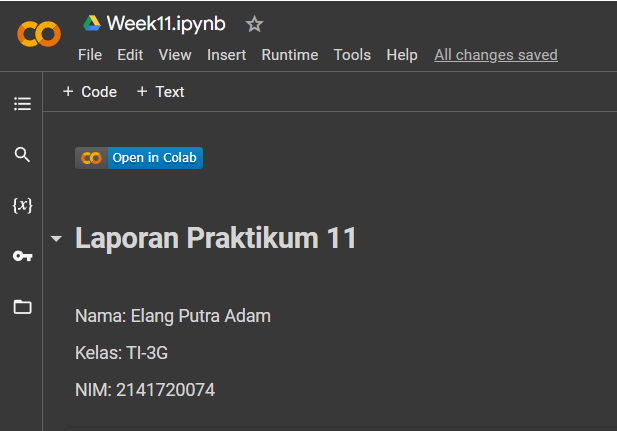

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

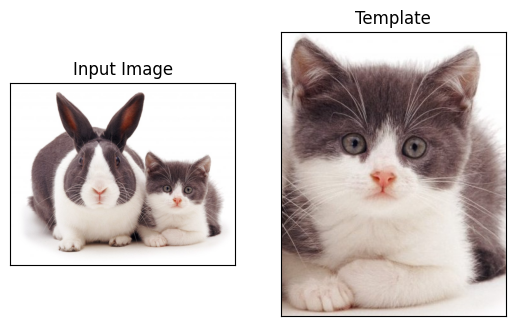

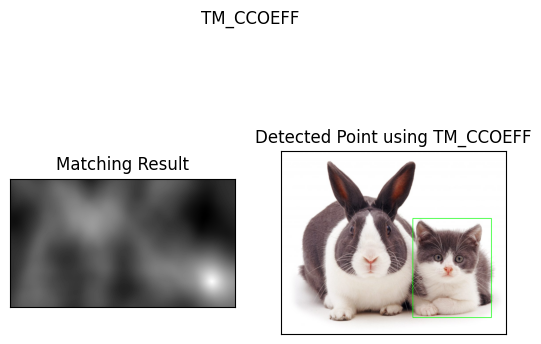

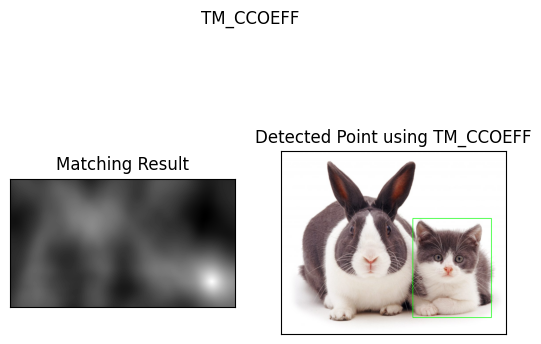

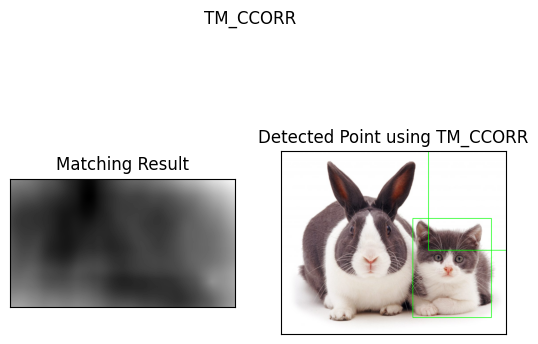

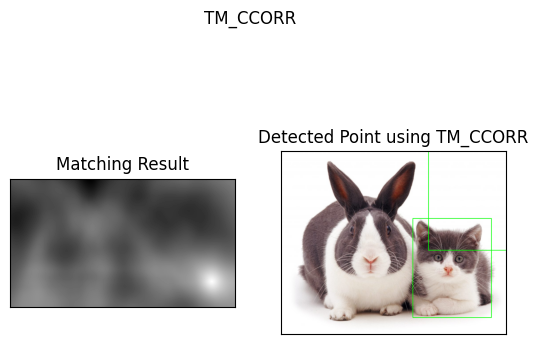

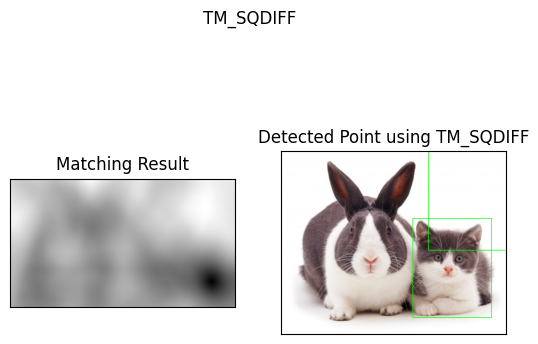

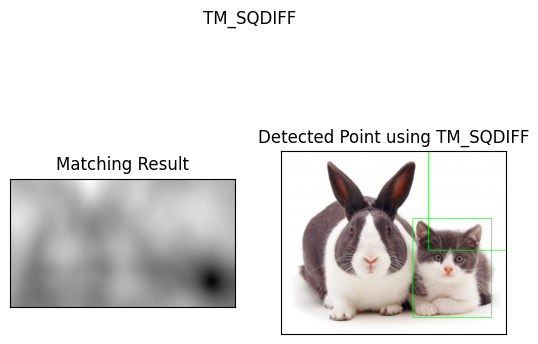

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the main image and the template
main_image = cv2.imread('/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg')

# Display the input image and the template
plt.figure()
plt.subplot(121), plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.title('Template'), plt.xticks([]), plt.yticks([])

plt.show()

# Convert the images to grayscale
main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR, cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

# Iterate over the methods and perform template matching
for method in methods:
    img = main_gray.copy()
    method_name = ''

    # Apply template matching
    res = cv2.matchTemplate(img, template_gray, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
        method_name = 'TM_SQDIFF'
    else:
        top_left = max_loc
        if method in [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]:
            method_name = 'TM_CCOEFF'
        else:
            method_name = 'TM_CCORR'

    h, w = template_gray.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw a rectangle around the matched region
    cv2.rectangle(main_image, top_left, bottom_right, (0, 255, 0), 2)

    # Display the results
    plt.figure()
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point using ' + method_name), plt.xticks([]), plt.yticks([])
    plt.suptitle(method_name)

plt.show()

Keterangan :
Pada gambar tersebut untuk gambar yang menggunakan methode biasa terdapat pada bagian atas, dan untuk methode yang normed pada bagian yang bawah

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

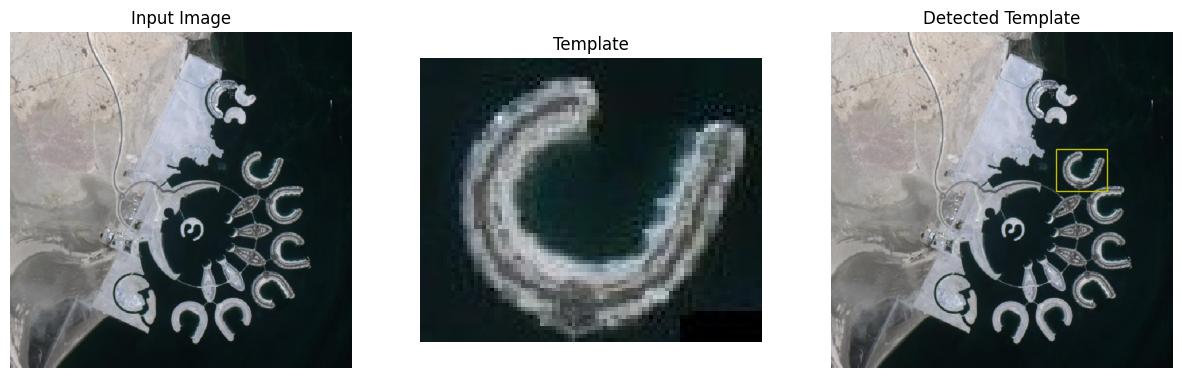

In [8]:
from PIL import Image

def normalize(arr):
    return (arr - arr.mean()) / (arr.std() * len(arr))

# Load images
img = Image.open('/content/drive/MyDrive/PCVK/Object Detection/bahrain.jpg')
template = Image.open('/content/drive/MyDrive/PCVK/Object Detection/bahrain-template.jpg')

# Convert images to grayscale
img_gray = img.convert('L')
template_gray = template.convert('L')

# Convert images to NumPy arrays
img_array = np.array(img_gray)
template_array = np.array(template_gray)

# Normalize the arrays
img_norm = normalize(img_array)
template_norm = normalize(template_array)

# Perform cross-correlation
correlation = np.zeros((img_array.shape[0] - template_array.shape[0], img_array.shape[1] - template_array.shape[1]))

for y in range(correlation.shape[0]):
    for x in range(correlation.shape[1]):
        roi = img_norm[y:y + template_array.shape[0], x:x + template_array.shape[1]]
        correlation[y, x] = np.sum(roi * template_norm)

# Find the location of the maximum correlation
y, x = np.unravel_index(np.argmax(correlation), correlation.shape)

# Display the result
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title('Input Image')
ax[0].axis('off')

ax[1].imshow(template)
ax[1].set_title('Template')
ax[1].axis('off')

ax[2].imshow(img)
rect = plt.Rectangle((x, y), template_array.shape[1], template_array.shape[0], edgecolor='y', facecolor='none')
ax[2].add_patch(rect)
ax[2].set_title('Detected Template')
ax[2].axis('off')

plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

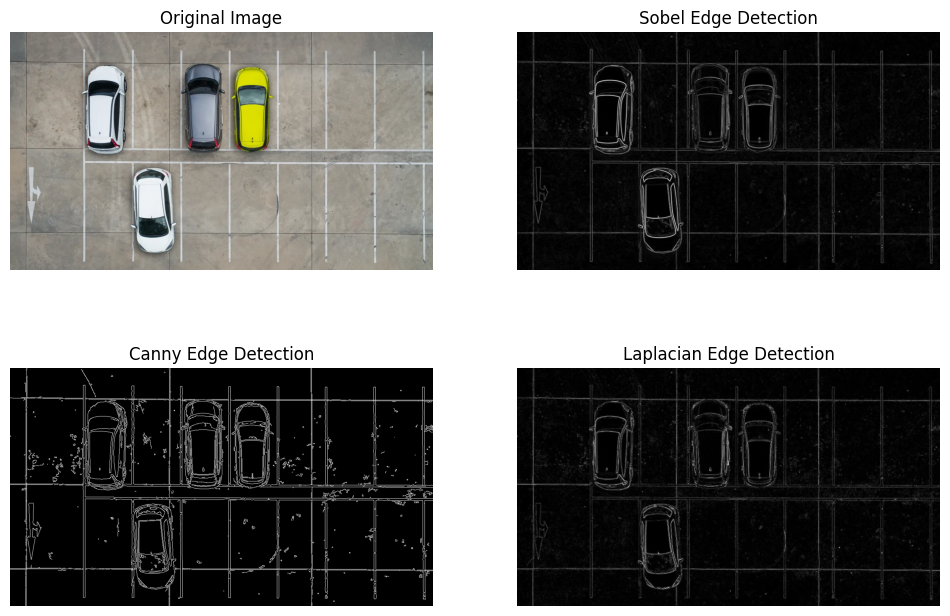

<Figure size 640x480 with 0 Axes>

In [9]:
from cv2.gapi import Laplacian
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Object Detection/car-park.jpg')

# Konversi ke citra keabuan
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny = cv2.Canny(gray_image, 50, 150)

# Laplacian Edge Detection
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian))

# Tampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(221), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(222), plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(223), plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(224), plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

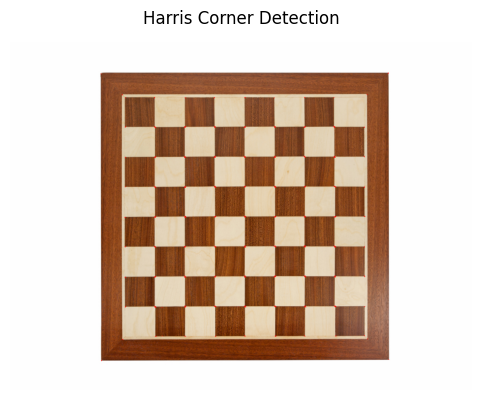

In [10]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan metode Harris
corner_harris = cv2.cornerHarris(gray, 2, 3, 0.04)

# Ambil nilai sudut yang cukup besar (threshold)
threshold = 0.01 * corner_harris.max()
image[corner_harris > threshold] = [0, 0, 255]  # Ubah sudut yang dideteksi menjadi warna merah

# Tampilkan hasil Harris Corner Detection
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

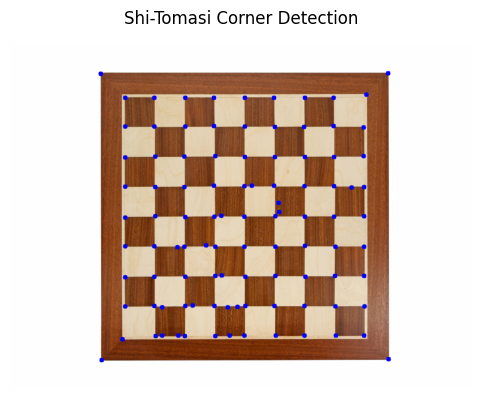

In [11]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan metode Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

# Gambar sudut pada gambar
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 5, 255, -1)

# Tampilkan hasil Shi-Tomasi Corner Detection
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


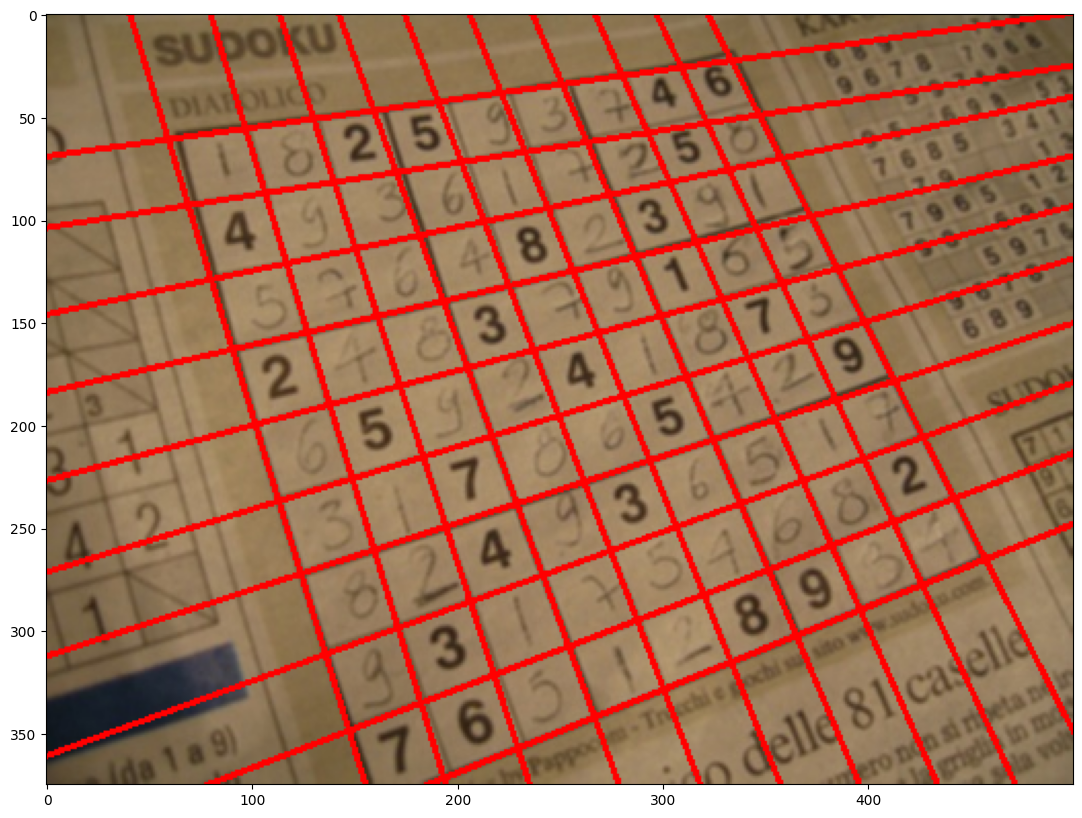

In [12]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg')

# Konversi ke citra keabuan
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv.Canny (gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(image, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

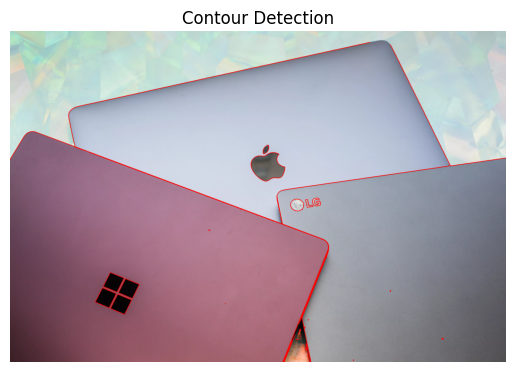

In [13]:
# Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg')

# Ubah gambar ke citra keabuan
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Terapkan Gaussian Blur untuk mengurangi noise
edged = cv2.Canny(gray, 30, 200)

# Cari kontur menggunakan findContours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Gambar kontur pada gambar asli
cv2.drawContours(image, contours, -1, (0, 0, 255), 3)

# Tampilkan hasil deteksi kontur
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.axis('off')
plt.show()

# E. Pengayaan Materi KTP

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

2. Muat 2 library berikut sebagai tahapan persiapan

In [14]:
import cv2
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

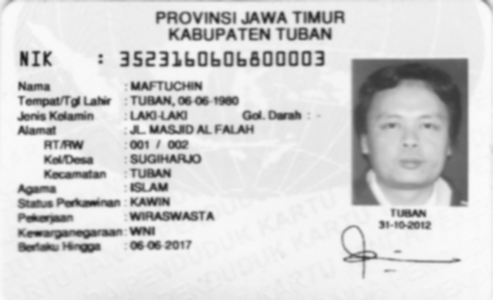

In [16]:
# Lokasi hasil pelat
src = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/ktp3.png")
blurred = src.copy()
# Konversi gambar ke citra keabuan
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Terapkan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Tambahkan kode di sini untuk pemrosesan tambahan (jika diperlukan)
# Tampilkan hasil dari setiap gambar yang telah diproses
cv2_imshow(blurred)

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

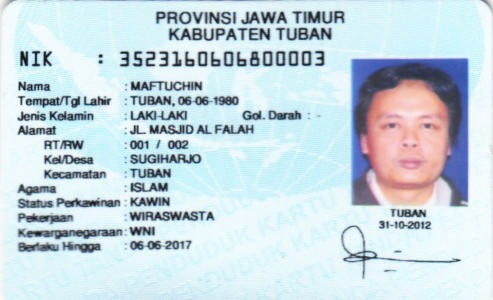

In [17]:
# Lokasi hasil pelat
src = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/ktp3.png")
blurred = src.copy()

# Terapkan Gaussian Blur untuk mengurangi noise
blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# Tambahkan kode di sini untuk pemrosesan tambahan (jika diperlukan)
# Tampilkan hasil dari setiap gambar yang telah diproses
cv2_imshow(blurred)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra

168.0 (300, 493)


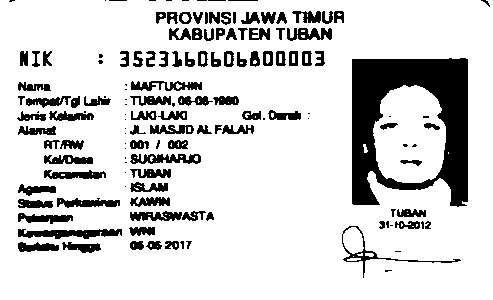

In [18]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

cv2_imshow(bw)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

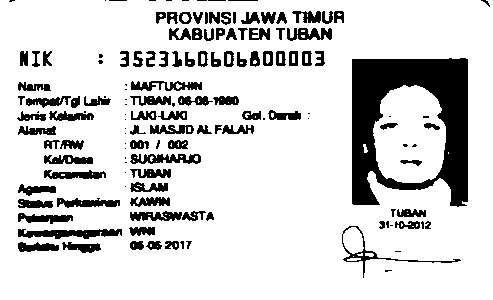

In [19]:
erode = cv2.erode(bw.copy(),cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

cv2_imshow(erode)

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

+ x=307, y=14, w=1, h=3, rasio=0.33


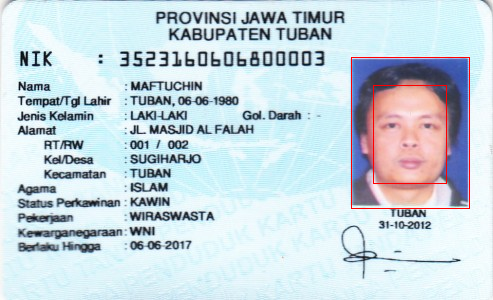

In [20]:
# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  ras = format(w / h, '.2f')
  if h >= 40 and w >= 10 and float(ras) <= 1:
    cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

print("+ x={}, y={}, w={}, h={}, rasio={}".format(x,y, w, h, ras))
cv2_imshow(src)

# F. Tugas Praktikum

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan secara berkelompok dengan aturan sebagai berikut:

Kelompok 3 - KTP Arief Wijaya Cimahi

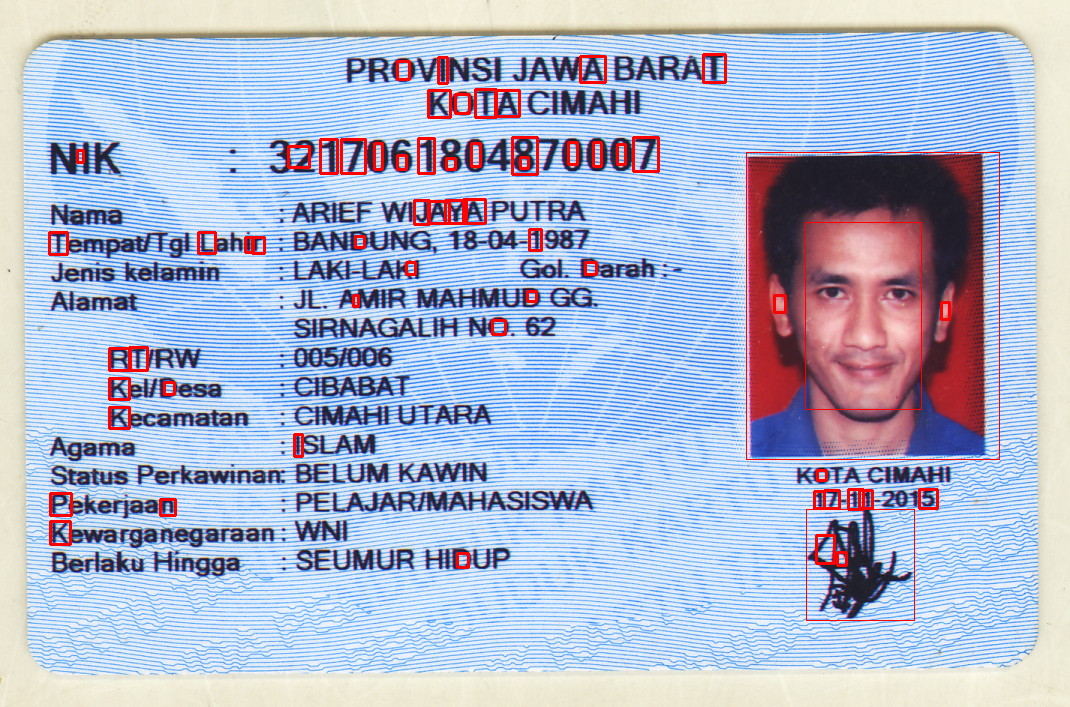

In [21]:
from google.colab.patches import cv2_imshow

ktp = cv.imread("/content/drive/MyDrive/PCVK/Images/KTP_More/ktp2.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)